In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = 'country_wise_latest.csv' 
data = pd.read_csv(file_path)

data.head()
data = data.dropna(subset=['Confirmed', 'Deaths', 'Recovered', 'Active'])


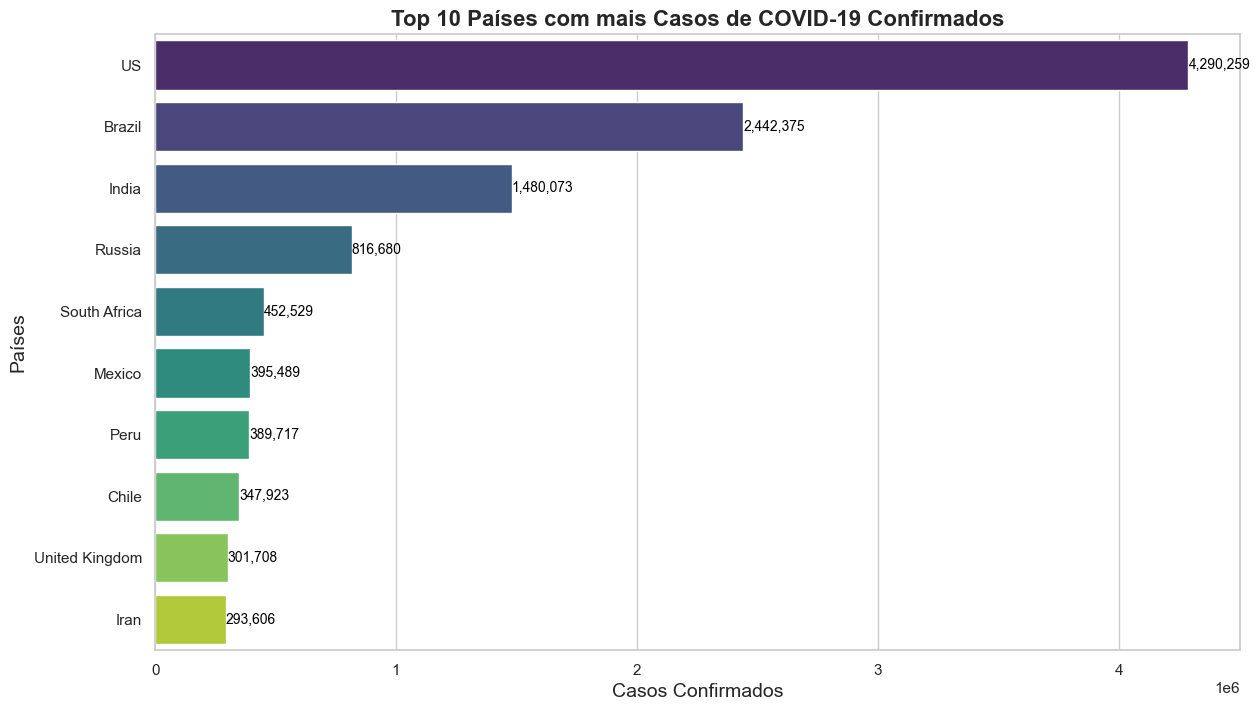

In [67]:
top_10_confirmados = data.nlargest(10, 'Confirmed')

plt.figure(figsize=(14, 8))
sns.barplot(x='Confirmed', y='Country/Region', data=top_10_confirmados, palette="viridis")

for indice, valor in enumerate(top_10_confirmados['Confirmed']):
    plt.text(valor, indice, f'{valor:,.0f}', va='center', color='black', fontsize=10)

plt.title("Top 10 Países com mais Casos de COVID-19 Confirmados", fontsize=16, fontweight='bold')
plt.xlabel("Casos Confirmados", fontsize=14)
plt.ylabel("Países", fontsize=14)

plt.show()

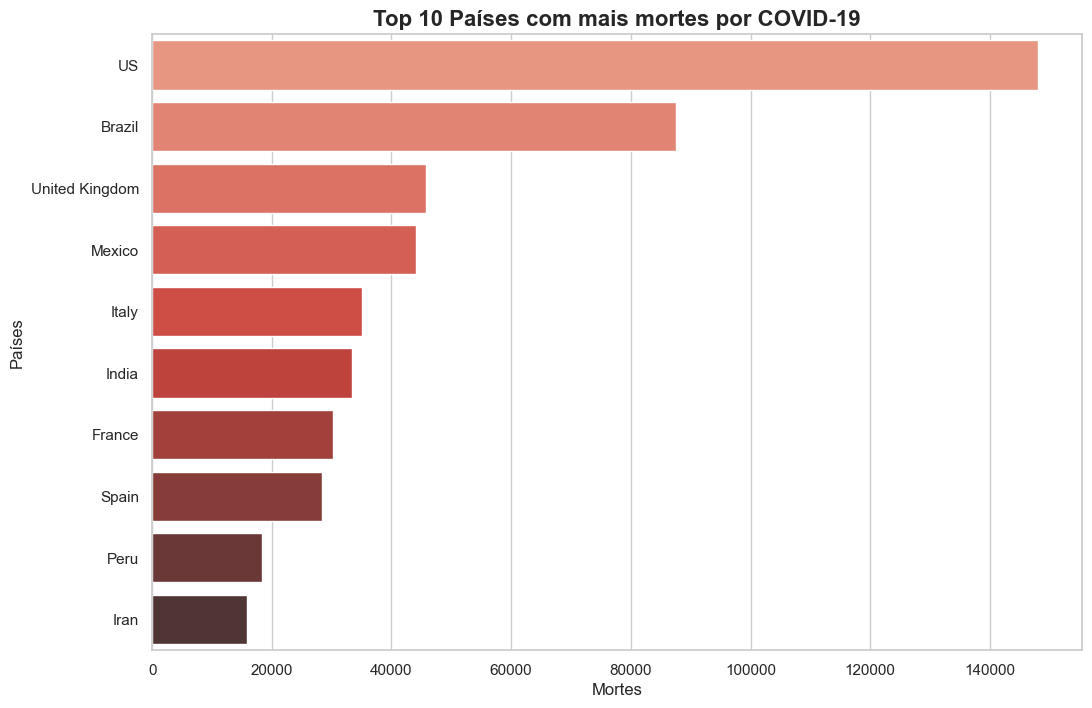

In [68]:
top_10_mortes = data.nlargest(10, 'Deaths')
plt.figure(figsize=(12, 8))
sns.barplot(x='Deaths', y='Country/Region', data=top_10_mortes, palette="Reds_d")
plt.title("Top 10 Países com mais mortes por COVID-19", fontsize=16, fontweight='bold')
plt.xlabel("Mortes")
plt.ylabel("Países")
plt.show()

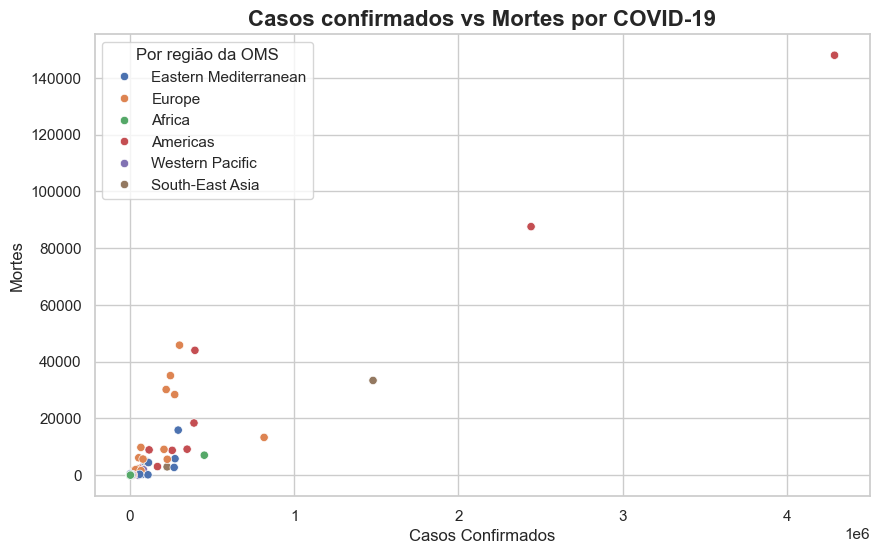

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Confirmed', y='Deaths', hue='WHO Region', data=data)
plt.title("Casos confirmados vs Mortes por COVID-19", fontsize=16, fontweight='bold')
plt.xlabel("Casos Confirmados")
plt.ylabel("Mortes")
plt.legend(loc='upper left', title='Por região da OMS')
plt.show()

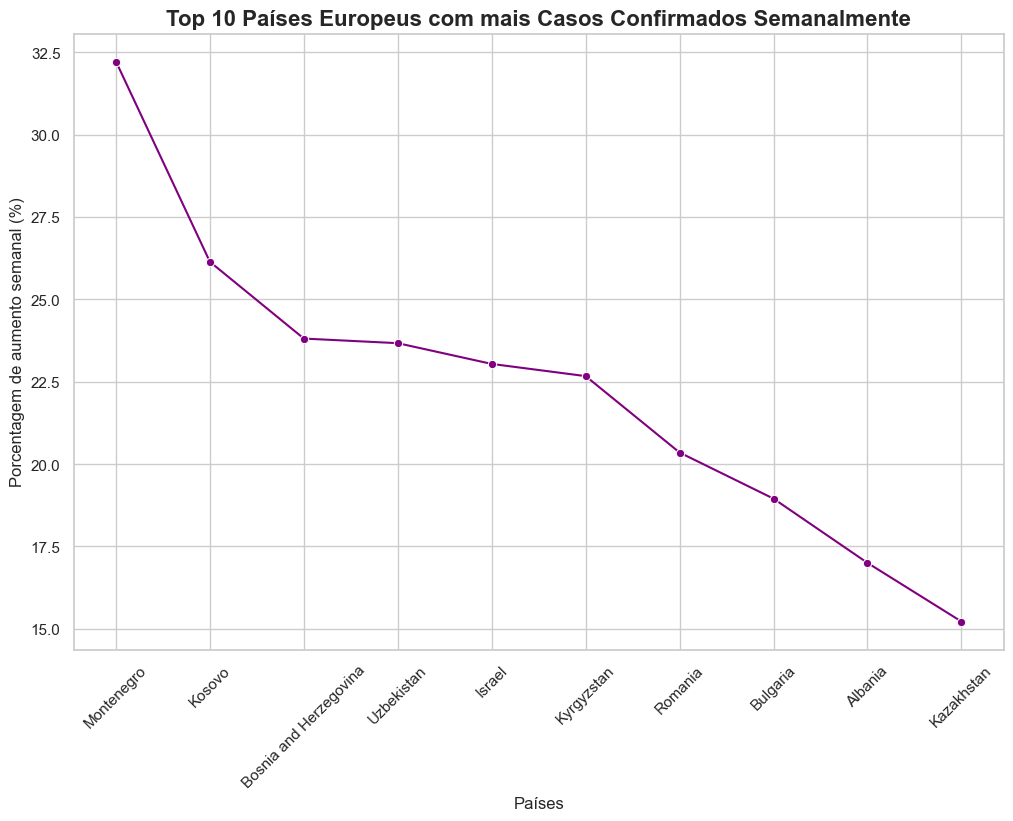

In [75]:
paises_europa = data[data['WHO Region'] == 'Europe']
paises_europa = paises_europa.nlargest(10, '1 week % increase')
plt.figure(figsize=(12, 8))
sns.lineplot(x='Country/Region', y='1 week % increase', data=paises_europa, marker='o', color="purple")
plt.title("Top 10 Países Europeus com mais Casos Confirmados Semanalmente", fontsize=16, fontweight='bold')
plt.xlabel("Países")
plt.ylabel("Porcentagem de aumento semanal (%)")
plt.xticks(rotation=45)
plt.show()

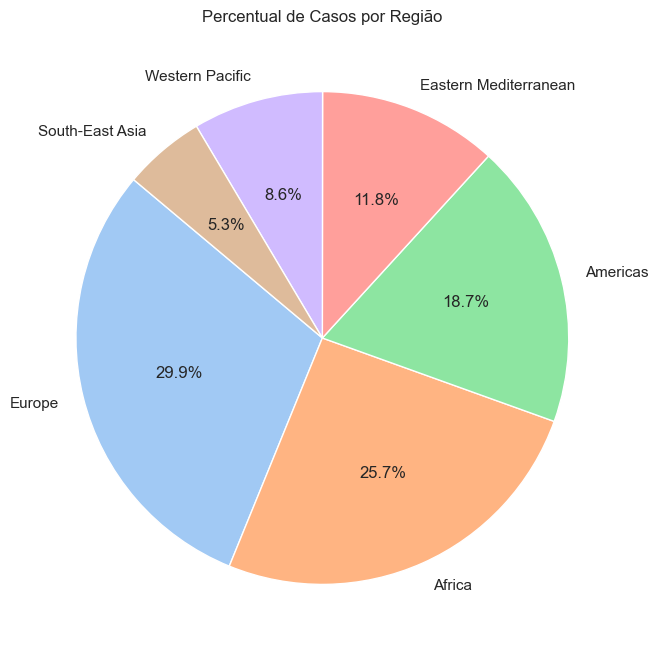

In [71]:
numero_regioes = data['WHO Region'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(numero_regioes, labels=numero_regioes.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Percentual de Casos por Região")
plt.show()

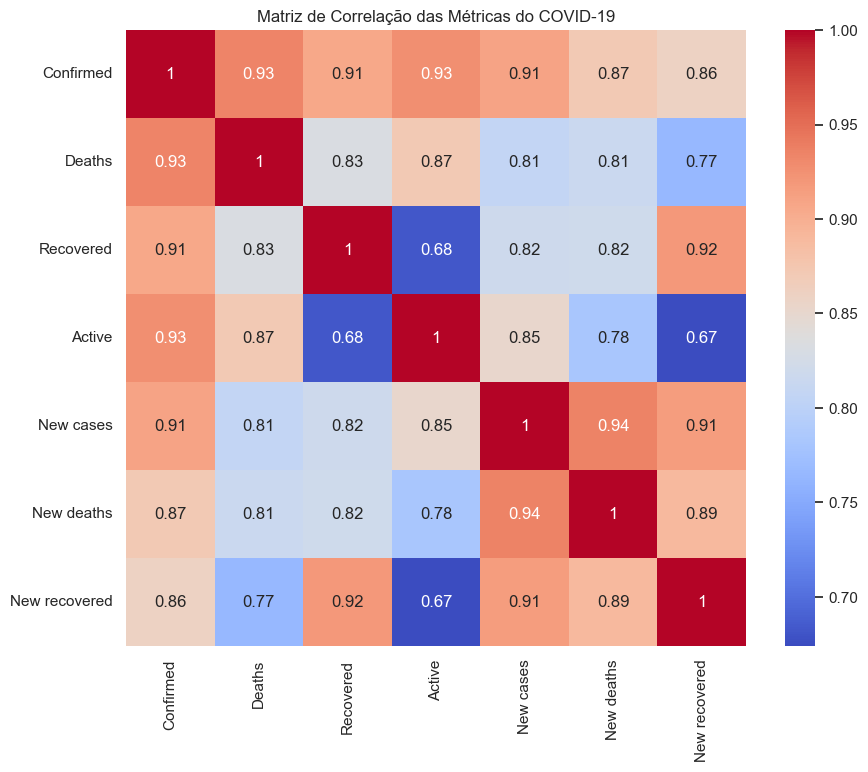

In [74]:
metricas_covid = data[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']]
matrix_correlacao = metricas_covid.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_correlacao, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação das Métricas do COVID-19")
plt.show()